In [6]:
from diffusers import StableDiffusionPipeline
import torch as th

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=th.float16)
pipe = pipe.to("cuda")
prompt = "a photo of an astronaut riding a horse on mars"		# 一张宇航员在火星骑马的图片
image = pipe(prompt=prompt).images[0]
image.save("astronaut_rides_horse.png")

text_encoder\model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

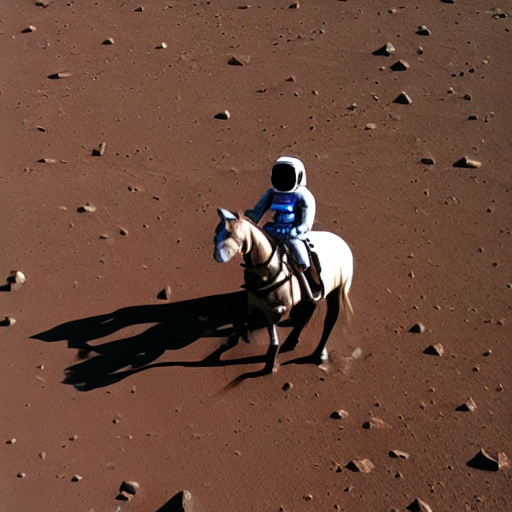

In [7]:
image

  0%|          | 0/50 [00:00<?, ?it/s]

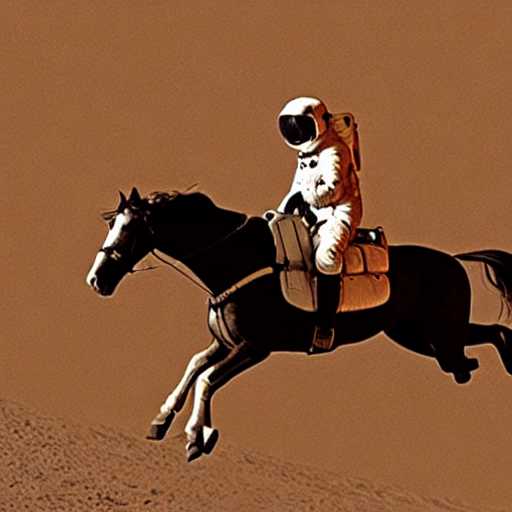

In [8]:
generator = th.Generator("cuda").manual_seed(1)
prompt = "a photo of an astronaut riding a horse on mars"		# 一张宇航员在火星骑马的图片
image = pipe(prompt=prompt, generator=generator).images[0]
image

  0%|          | 0/70 [00:00<?, ?it/s]

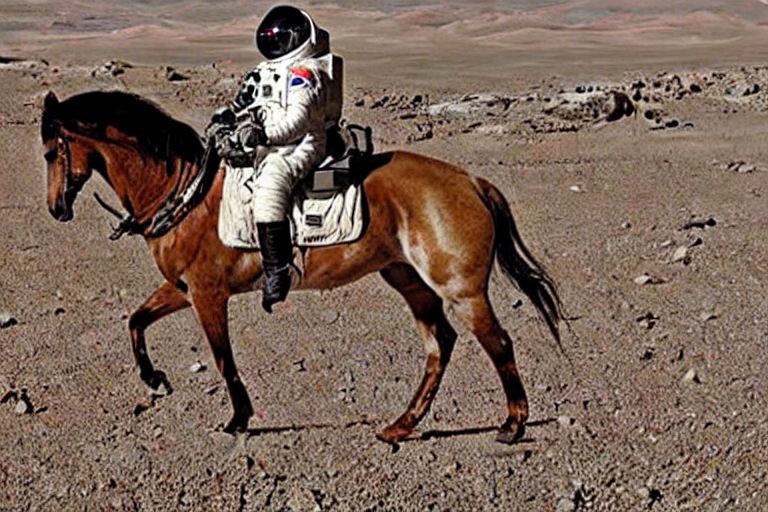

In [9]:
image = pipe(prompt=prompt, generator=generator, height=512, width=768, num_inference_steps=70, guidance_rescale=2).images[0]
image

In [ ]:
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel
from diffusers import LMSDiscreteScheduler

# 单独家在CLIP模型和tokenizer
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")
# 单独加载U-Net模型
unet = UNet2DConditionModel.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="unet")
# 单独加载VAE模型
vae = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae")
# 单独加载调度算法
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)

pipe = StableDiffusionPipeline(vae=vae, text_encoder=text_encoder, tokenizer=tokenizer, unet=unet, scheduler=scheduler)
pipe = pipe.to("cuda")
prompt = "a photo of an astronaut riding a horse on mars"		# 一张宇航员在火星骑马的图片
image = pipe(prompt=prompt).images[0]

In [1]:
import torch as th
from diffusers import StableDiffusionPipeline

[2023-07-19 15:47:42,119] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


NOTE: Redirects are currently not supported in Windows or MacOs.


In [2]:
model_id = "runwayml/stable-diffusion-v1-5"
prompt = "a photo of an astronaut riding a horse on mars"		# 一张宇航员在火星骑马的图片

In [2]:
th.cuda.empty_cache()
pre_memory = th.cuda.memory_allocated() / 1e9
pipe1 = StableDiffusionPipeline.from_pretrained(model_id).to("cuda")
image1 = pipe1(prompt=prompt).images[0]
post_memory = th.cuda.memory_allocated() / 1e9
print(f"32位浮点数加载模型的显存占用: {(post_memory - pre_memory):.5f} GB")

th.cuda.empty_cache()
pre_memory = th.cuda.memory_allocated() / 1e9
pipe2 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=th.float16).to("cuda")
image2 = pipe2(prompt=prompt).images[0]
post_memory = th.cuda.memory_allocated() / 1e9
print(f"16位浮点数加载模型的显存占用: {(post_memory - pre_memory):.5f} GB")

safety_checker\model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

32位浮点数加载模型的显存占用: 5.51042 GB


safety_checker\model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

16位浮点数加载模型的显存占用: 2.77909 GB
